# Creates the CDF used to empirically sample subgiants

In [1]:
from surp import subgiants
import scipy
import numpy as np
import matplotlib.pyplot as plt
import arya
from statsmodels.distributions import ECDF
import pandas as pd

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
import surp

In [3]:
R = subgiants.R_gal[np.isfinite(subgiants.R_gal)]

Text(0, 0.5, 'counts')

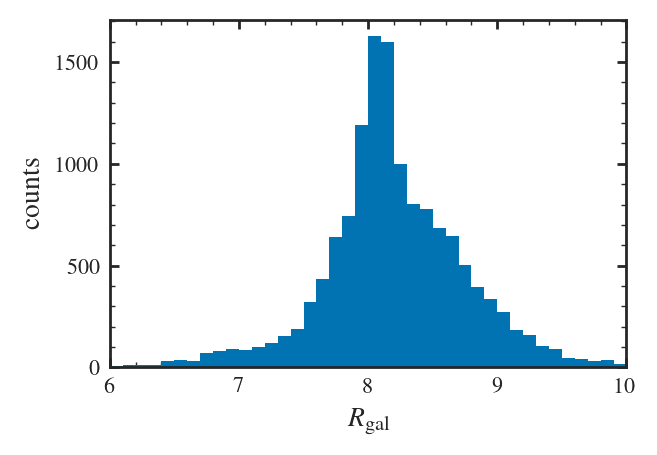

In [6]:
bins = np.arange(0, 20, 0.1)
counts, _, _ = plt.hist(R, bins=bins)
plt.xlim(6, 10)
plt.xlabel(r"$R_{\rm gal}$")
plt.ylabel("counts")

In [7]:
cdf = ECDF(R)

In [8]:
max_R = 15.5
R_sample = np.arange(0, max_R, 0.01)
norm_cdf = cdf(R_sample)/cdf(max_R)
table = pd.DataFrame({"R": R_sample, "cdf": norm_cdf})

In [9]:
table.to_csv(surp.DATA_DIR + "/R_subgiants_cdf.csv")

In [10]:
df = surp.vice_utils.load_cdf()

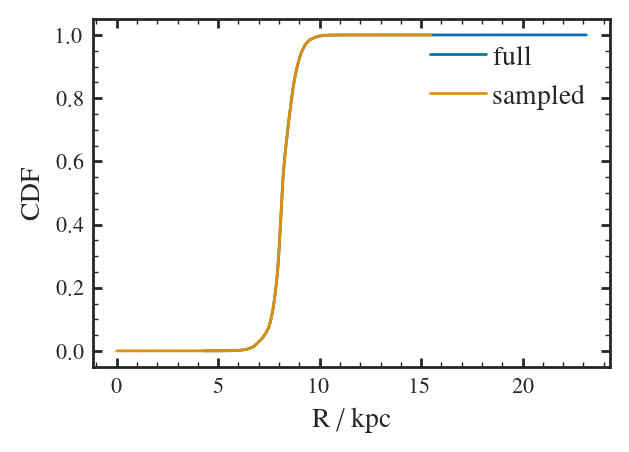

In [11]:

plt.plot(cdf.x, cdf.y, label="full")
plt.plot(df.R, df.cdf, label="sampled")
plt.xlabel("R / kpc")
plt.ylabel("CDF")
arya.Legend()